In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
datos = pd.read_csv('NewDataAll.csv', low_memory=False)
datos = datos.replace('****', np.nan)  # Reemplazar '****' con NaN
datos = datos.dropna()  # Eliminar filas con valores no válidos
datos.drop('caudef', axis=1, inplace=True)

In [3]:
datos.tail()

,Unnamed: 0,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,perdif,ecidif,dnadif,mnadif,nacdif,dredif,mredif,asist,ocur,cerdef
953746,95996,9,901,4,2020,9,901,1,7,4,...,9,9,99,9999,9999,99,9999,1,1,1
953747,95997,10,1001,11,2020,10,1001,1,22,10,...,9,9,99,9999,9999,99,9999,5,6,9
953748,95998,1,101,6,2020,1,101,1,27,6,...,9,9,99,9999,9999,99,9999,1,1,1
953749,95999,9,901,2,2020,9,901,1,23,2,...,9,9,99,9999,9999,99,9999,1,1,1
953750,96000,1,101,1,2020,1,101,1,22,1,...,9,2,1,101,320,99,9999,1,1,1


In [4]:
datos.isnull()

,Unnamed: 0,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,perdif,ecidif,dnadif,mnadif,nacdif,dredif,mredif,asist,ocur,cerdef
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953746,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
953747,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
953748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
953749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

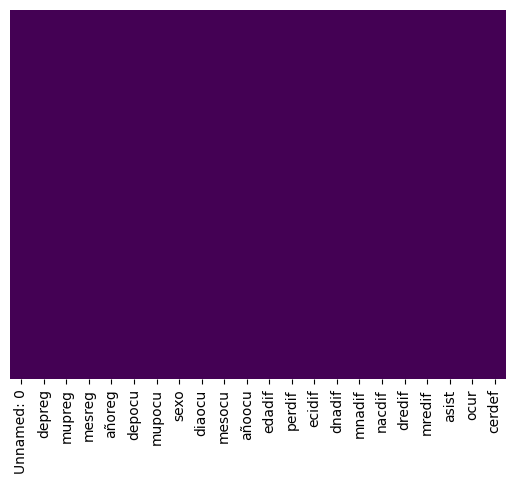

In [5]:
sns.heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='sexo', ylabel='count'>

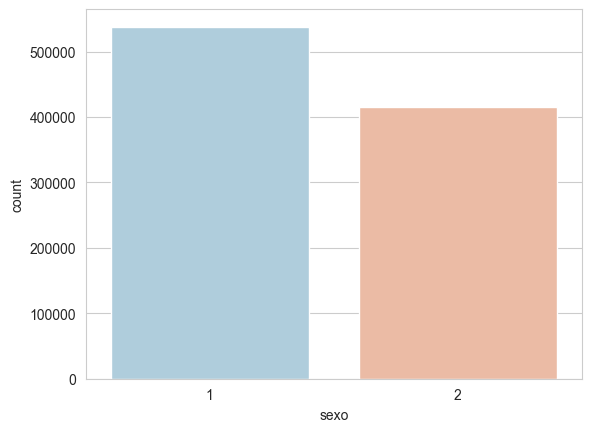

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'sexo', data = datos, palette = 'RdBu_r')

In [7]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(datos.drop('sexo' , axis = 1), 
                                                    datos['sexo'], test_size = 0.30, 
                                                    random_state = 101)

In [8]:
modeloLog = LogisticRegression(max_iter = 500)

In [9]:
non_numeric_values = datos.select_dtypes(exclude=[np.number])
print(non_numeric_values)

       mnadif
0         101
1         101
2         101
3         101
4         101
...       ...
953746   9999
953747   9999
953748   9999
953749   9999
953750    101

[953747 rows x 1 columns]


In [10]:
modeloLog.fit(X_entreno,y_entreno)

LogisticRegression(max_iter=500)

In [11]:
predicciones = modeloLog.predict(X_prueba)

In [12]:
print(classification_report(y_prueba, predicciones))

              precision    recall  f1-score   support

           1       0.56      0.99      0.72    161574
           2       0.42      0.01      0.01    124551

    accuracy                           0.56    286125
   macro avg       0.49      0.50      0.37    286125
weighted avg       0.50      0.56      0.41    286125



In [13]:
confusion_matrix(y_prueba,predicciones)

array([[160605,    969],
       [123852,    699]])

In [14]:
accuracy_score(y_prueba, predicciones)

0.5637536041939711